In [293]:
#import the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
import seaborn as sns

In [294]:
dia = pd.read_csv("Diabetes.csv")

In [295]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [296]:
dia.shape

(768, 9)

In [297]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [298]:
dia.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [299]:
dia = dia.rename(columns={'DiabetesPedigreeFunction' : 'DPF'})

In [300]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [301]:
dia['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [302]:
dia.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


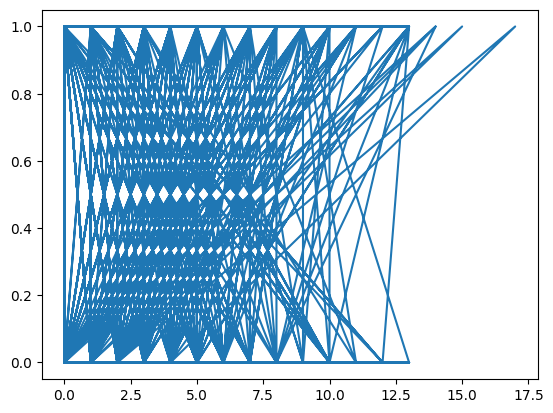

In [303]:
plt.plot(dia['Pregnancies'],dia['Outcome'])
#plt.bar(x = dia['Outcome'])

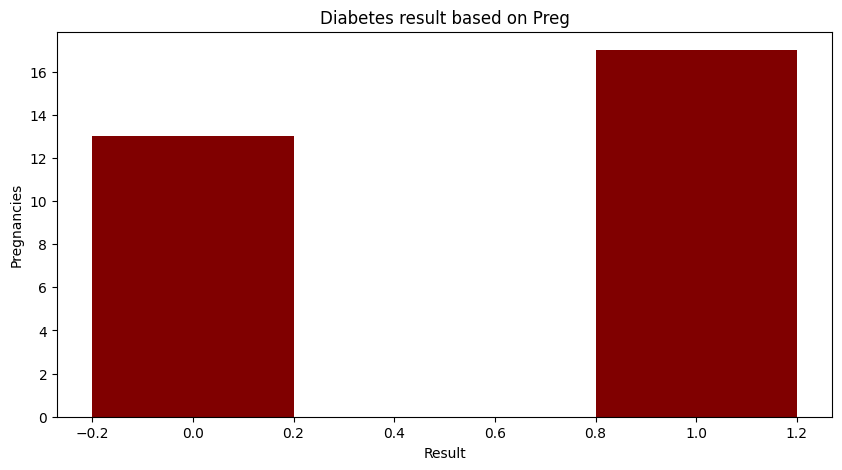

In [304]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dia['Outcome'] , dia['Pregnancies'], color ='maroon', 
        width = 0.4)
 
plt.xlabel("Result")
plt.ylabel("Pregnancies")
plt.title("Diabetes result based on Preg")
plt.show()

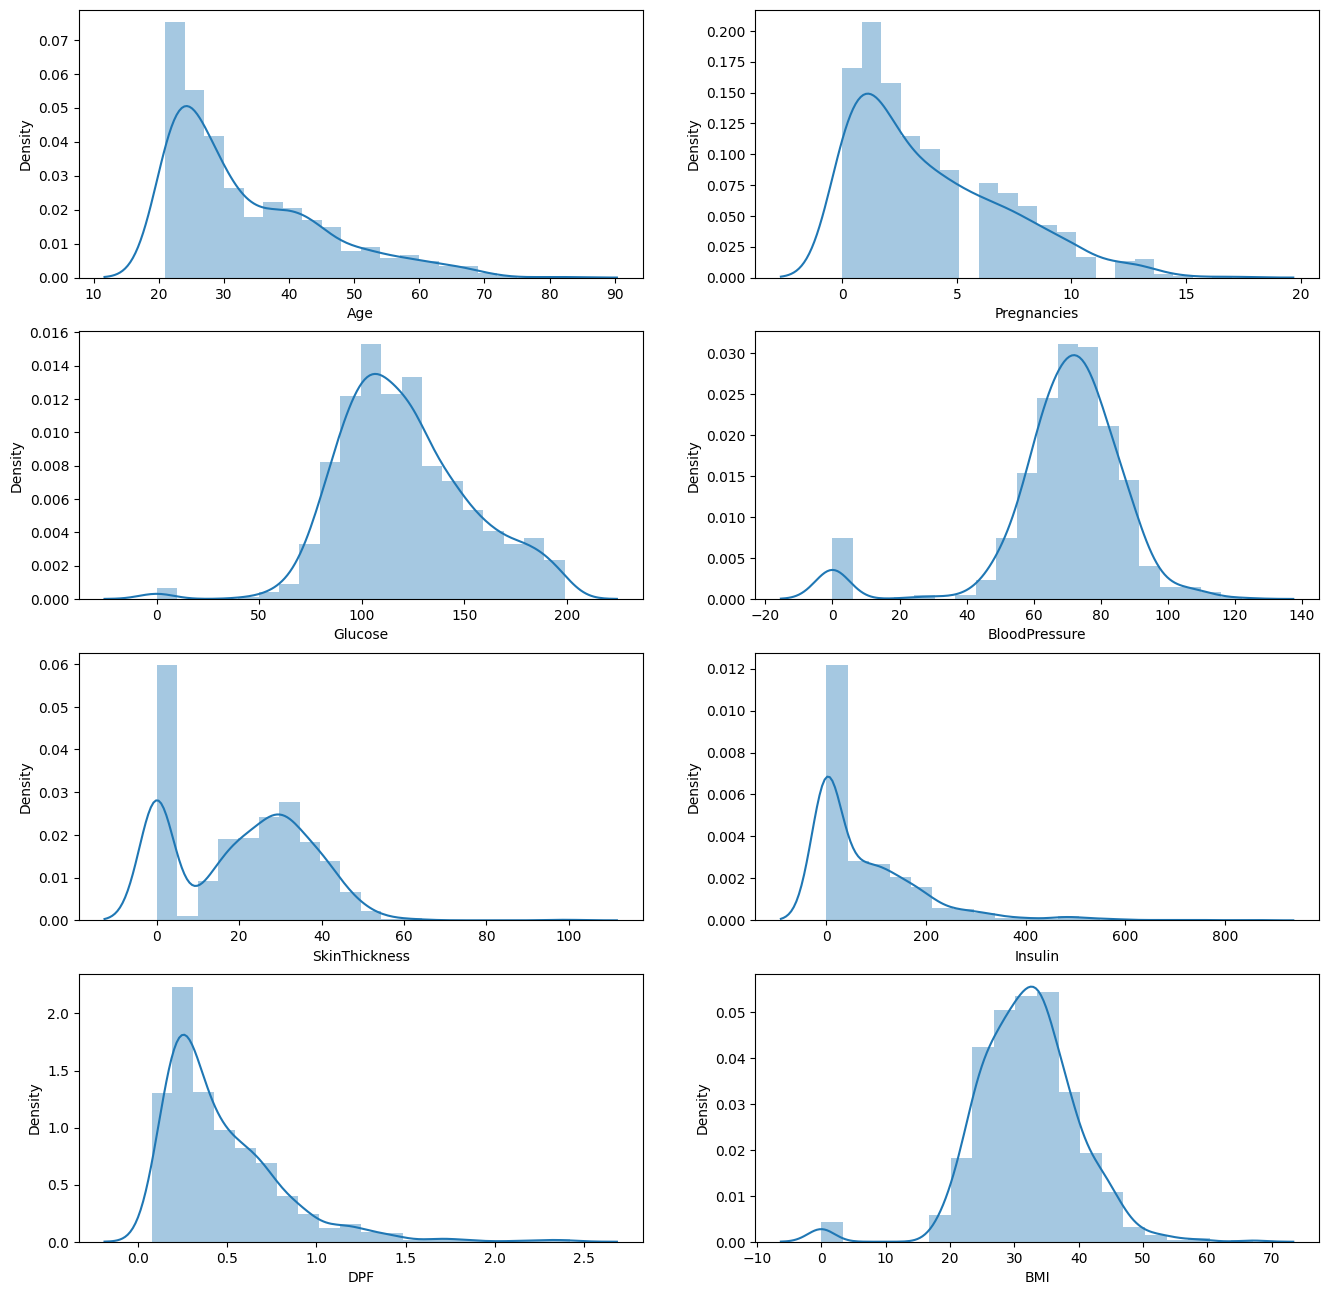

In [305]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(dia.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(dia.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(dia.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(dia.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(dia.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(dia.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(dia.DPF, bins = 20, ax=ax[3,0]) 
sns.distplot(dia.BMI, bins = 20, ax=ax[3,1]) 
import warnings
warnings.filterwarnings('ignore')

In [306]:
dia[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dia[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [307]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [308]:
# Now, we can look at where are missing values
dia.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64

In [309]:
!pip install missingno


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


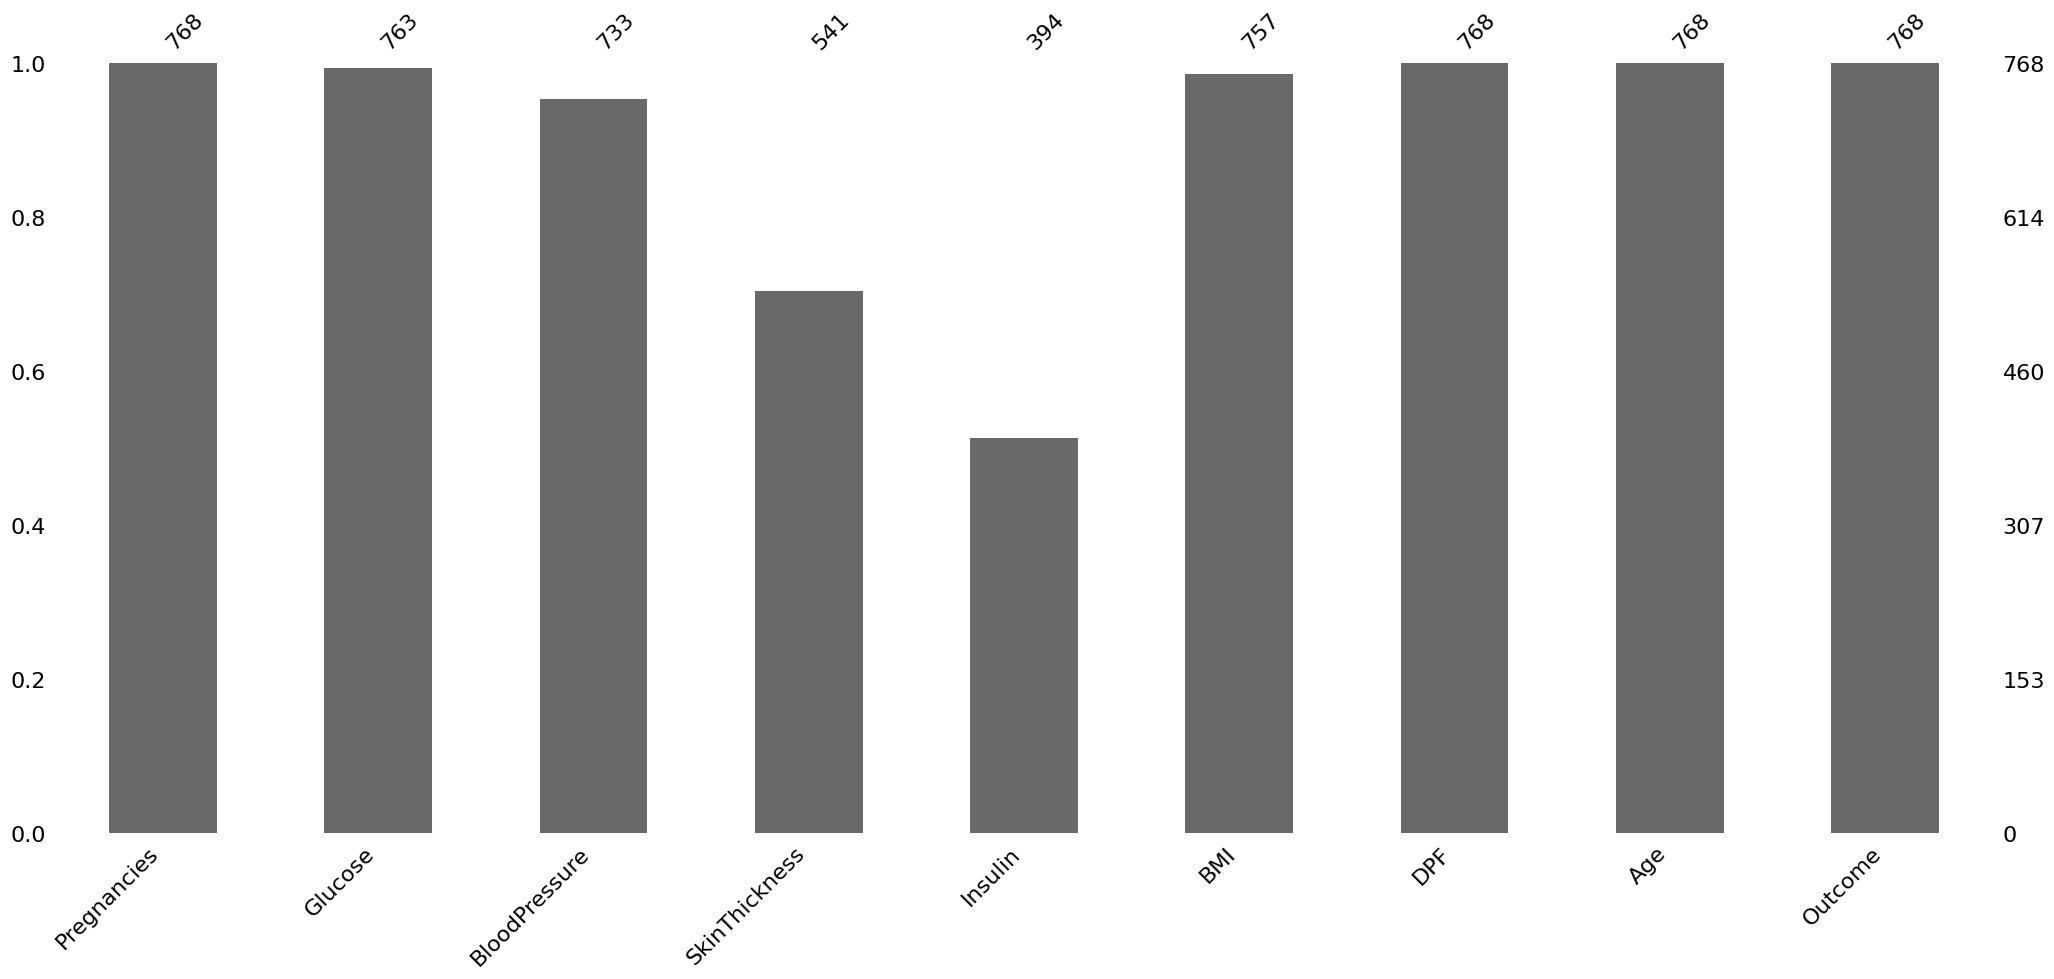

In [310]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting 
import missingno as msno
msno.bar(dia);

In [311]:
# The missing values will be filled with the median values of each variable.
def median_target(var):   
    temp = dia[dia[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [312]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = dia.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    dia.loc[(dia['Outcome'] == 0 ) & (dia[i].isnull()), i] = median_target(i)[i][0]
    dia.loc[(dia['Outcome'] == 1 ) & (dia[i].isnull()), i] = median_target(i)[i][1]

In [313]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [314]:
dia.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [315]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in dia:
    
    Q1 = dia[feature].quantile(0.25)
    Q3 = dia[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if dia[(dia[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DPF yes
Age yes
Outcome no


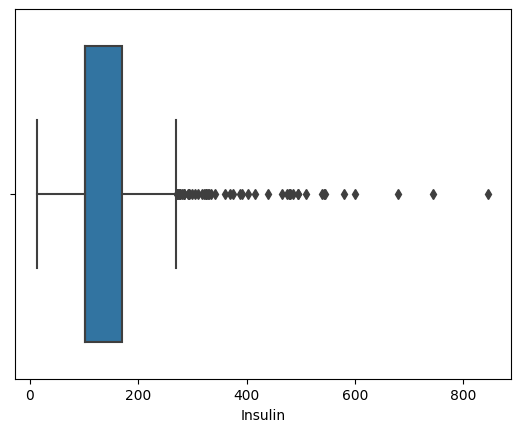

In [316]:
# The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
import seaborn as sns
sns.boxplot(x = dia["Insulin"]);

In [317]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = dia.Insulin.quantile(0.25)
Q3 = dia.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
dia.loc[dia["Insulin"] > upper,"Insulin"] = upper

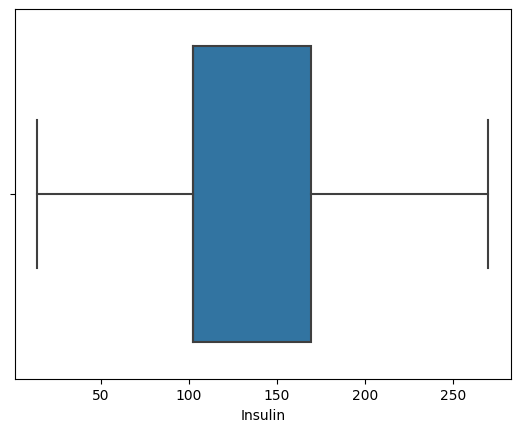

In [318]:

import seaborn as sns
sns.boxplot(x = dia["Insulin"]);

In [319]:
X = dia.drop(columns=['Outcome'])
y = dia['Outcome']
cols  = X.columns
index = X.index

In [320]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [321]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [322]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0              6    148.0           72.0           35.0    169.5  33.6  0.627   
1              1     85.0           66.0           29.0    102.5  26.6  0.351   
2              8    183.0           64.0           32.0    169.5  23.3  0.672   
3              1     89.0           66.0           23.0     94.0  28.1  0.167   
4              0    137.0           40.0           35.0    168.0  43.1  2.288   
..           ...      ...            ...            ...      ...   ...    ...   
763           10    101.0           76.0           48.0    180.0  32.9  0.171   
764            2    122.0           70.0           27.0    102.5  36.8  0.340   
765            5    121.0           72.0           23.0    112.0  26.2  0.245   
766            1    126.0           60.0           32.0    169.5  30.1  0.349   
767            1     93.0           70.0           31.0    102.5  30.4  0.315   

     Age  
0     50  
1    

In [323]:
#Training and Testing Data (divide the data into two part)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=1, stratify=y)

In [324]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
216            5    109.0           62.0           41.0    129.0  35.8  0.514   
556            1     97.0           70.0           40.0    102.5  38.1  0.218   
540            8    100.0           74.0           40.0    215.0  39.4  0.661   
697            0     99.0           70.0           27.0    102.5  25.0  0.253   
340            1    130.0           70.0           13.0    105.0  25.9  0.472   
..           ...      ...            ...            ...      ...   ...    ...   
721            1    114.0           66.0           36.0    200.0  38.1  0.289   
326            1    122.0           64.0           32.0    156.0  35.1  0.692   
712           10    129.0           62.0           36.0    169.5  41.2  0.441   
137            0     93.0           60.0           25.0     92.0  28.7  0.532   
645            2    157.0           74.0           35.0    270.0  39.4  0.134   

     Age  
216   25  
556  

In [325]:
y_train.shape

(537,)

In [326]:
#now implementing the model
from sklearn import svm

In [327]:
svm_model = svm.SVC(C=1.0, random_state=0, kernel='linear')

In [328]:
#for training data
svm_model.fit(X_train,y_train)
x_pred = svm_model.predict(X_test)
acc_score = accuracy_score(y_test,x_pred)
acc_score

0.7922077922077922

In [329]:
dia.head(-5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
758,1,106.0,76.0,27.0,102.5,37.5,0.197,26,0
759,6,190.0,92.0,32.0,169.5,35.5,0.278,66,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
761,9,170.0,74.0,31.0,169.5,44.0,0.403,43,1


In [330]:
input_data = (8,179,72,42,130,32.7,0.719,36)
numpy_array = np.asarray(input_data)
reshape_data = numpy_array.reshape(1,-1)


result = svm_model.predict(reshape_data)
print(result)
if (result[0] == 0):
    print("Person have No Diabetes")
else:
    print("Person have diabetes")

[1]
Person have diabetes
